In [30]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
StockCsv = pd.read_csv('train-v3.csv')
StockCsv_valid = pd.read_csv('valid-v3.csv')
StockCsv_test = pd.read_csv('test-v3.csv')
title=StockCsv.columns
StockCsv

,id,price,sale_yr,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,5615100330,200000,2015,3,27,4,2.00,1900,8160,1,...,7,1900,0,1975,0,98022,47.2114,-121.986,1280,6532
1,8835900086,350000,2014,9,2,4,3.00,3380,16133,1,...,8,2330,1050,1959,0,98118,47.5501,-122.261,2500,11100
2,9510900270,254000,2014,12,11,3,2.00,2070,9000,1,...,7,1450,620,1969,0,98023,47.3085,-122.376,1630,7885
3,2621600015,175000,2015,4,30,3,1.00,1150,8924,1,...,6,1150,0,1943,0,98030,47.3865,-122.217,1492,8924
4,8078350090,619000,2015,3,31,3,2.50,2040,7503,2,...,8,2040,0,1987,0,98029,47.5718,-122.021,2170,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12962,9253900354,580000,2014,7,1,3,2.50,2200,11000,2,...,9,2200,0,1978,0,98008,47.5916,-122.112,2200,12851
12963,9510300130,598000,2014,6,28,4,2.50,3130,40918,2,...,9,3130,0,1994,0,98045,47.4761,-121.723,2760,35440
12964,1105000373,252500,2015,5,6,2,1.50,1110,986,2,...,7,950,160,2009,0,98118,47.5427,-122.272,1110,3515
12965,3629990280,497000,2014,6,23,3,2.25,1630,3817,2,...,7,1630,0,2005,0,98029,47.5485,-121.999,1630,3348


In [32]:
data=StockCsv['price'].describe()
print(data)
q_1=np.quantile(StockCsv['price'], q=0.1)
q_9=np.quantile(StockCsv['price'], q=0.98)
BOOL=(StockCsv['price']<q_9)
# print(StockCsv.shape)
print(BOOL)
StockCsv=StockCsv[BOOL]
print(StockCsv.shape)

count    1.296700e+04
mean     5.373833e+05
std      3.668840e+05
min      7.500000e+04
25%      3.199500e+05
50%      4.470000e+05
75%      6.370000e+05
max      7.062500e+06
Name: price, dtype: float64
0        True
1        True
2        True
3        True
4        True
         ... 
12962    True
12963    True
12964    True
12965    True
12966    True
Name: price, Length: 12967, dtype: bool
(12697, 23)


[ 148719.09134029 1615978.84217328]


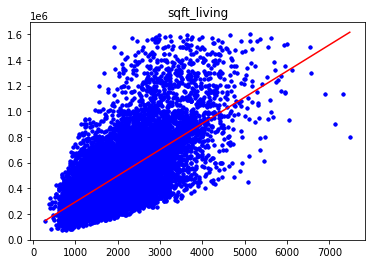

[[ 290]
 [7480]]
[ 492145.96653298 1182077.92787584]


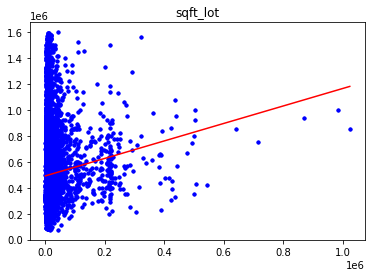

[[    572]
 [1024068]]
[499863.94785155 876808.33333333]


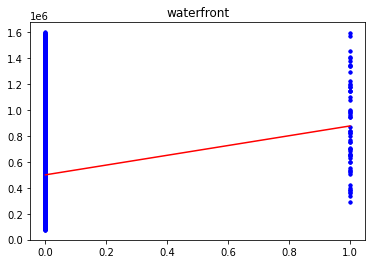

[[0]
 [1]]
[478109.76008622 943214.17282586]


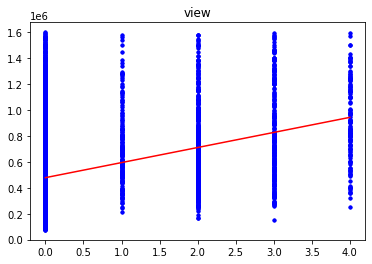

[[0]
 [4]]
[463528.7036488  526701.29975521]


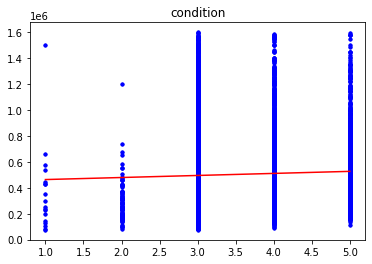

[[1]
 [5]]
[-524440.3553662  1188772.94304301]


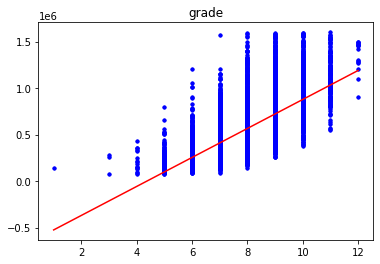

[[ 1]
 [12]]
[ 230418.17548024 1543575.84907736]


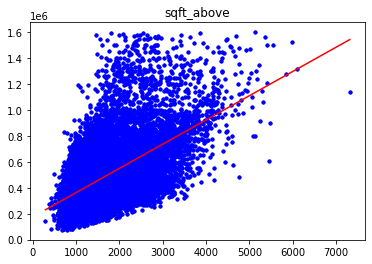

[[ 290]
 [7320]]
[453281.84702508 950121.51462375]


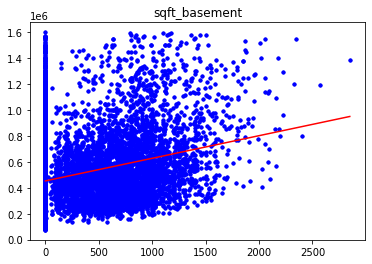

[[   0]
 [2850]]
[219392.58236079 657505.35889333]


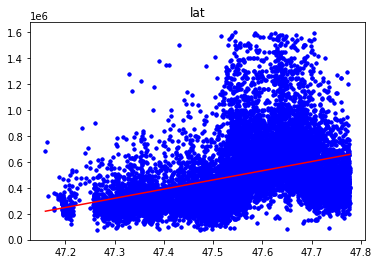

[[47.1593]
 [47.7776]]
[474701.96053261 582185.46737028]


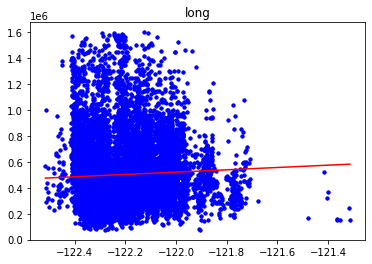

[[-122.515]
 [-121.315]]
[ 139354.55735691 1397041.32339669]


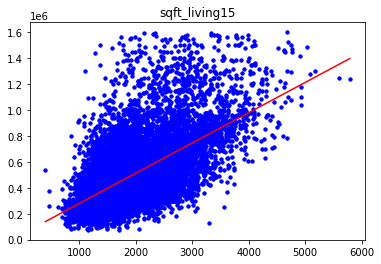

[[ 399]
 [5790]]
[ 492922.71437871 1126352.98329938]


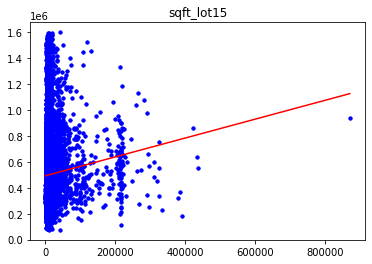

[[   659]
 [871200]]


In [33]:
title=[ 'bedrooms',
       'bathrooms', 'sqft_living', 'sqft_lot','waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement',
      'lat', 'long', 'sqft_living15',
       'sqft_lot15']
for i in title[2:]:
    y=StockCsv["price"]
    x=StockCsv[i]
    plt.plot(x,y,"b.")
    X_b = np.c_[np.ones((len(StockCsv[i]), 1)), x]  
    linear = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    X_new = np.array([[min(x)], [max(x)]])
    X_new_b = np.c_[np.ones((2, 1)), X_new] 
    y_predict = X_new_b.dot(linear)
    plt.plot(x, y, "b.")
    plt.plot(X_new, y_predict, "r-")
    name=i+'線性回歸'+'.png'
    plt.show()

Index(['sale_yr', 'sale_month', 'sale_day', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
[[ 1.29670000e+04  2.61197200e+07  8.52200000e+04  2.03970000e+05
   4.36000000e+04  2.73092500e+04  2.68584830e+07  1.94445192e+08
   1.87100000e+04  1.04000000e+02  3.03700000e+03  4.42970000e+04
   9.91460000e+04  2.31038460e+07  3.75463700e+06  2.55549350e+07
   1.07559800e+06  1.27178338e+09  6.16696385e+05 -1.58475626e+06
   2.56765230e+07  1.65932712e+08]
 [ 2.61197200e+07  5.26135428e+10  1.71645840e+08  4.10861381e+08
   8.78244700e+07  5.50095658e+07  5.41015277e+10  3.91676842e+11
   3.76879130e+07  2.09491000e+05  6.11749500e+06  8.92282670e+07
   1.99711848e+08  4.65384895e+10  7.56303816e+09  5.14758807e+10
   2.16656965e+09  2.56178189e+12  1.24222539e+09 -3.19221021

TypeError: Cannot cast array data from dtype('float64') to dtype('<U32') according to the rule 'safe'

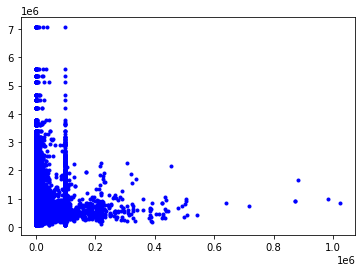

In [55]:
    i=StockCsv.columns[2:]
    print(i)
    y=StockCsv["price"]
    x=StockCsv[i]
    plt.plot(x,y,"b.")
    #plt.show()
    X_b = np.c_[np.ones((len(StockCsv[i]), 1)), x]  # add x0 = 1 to each instance
    print(X_b.T.dot(X_b))
    linear = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    print(linear)
    X_new = np.array([[min(StockCsv[i])], [max(StockCsv[i])]])
    X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
    y_predict = X_new_b.dot(linear)
    print(y_predict)
    plt.plot(x, y, "b.")
    plt.plot(X_new, y_predict, "r-")
    name=i+'線性回歸'+'.png'
    plt.title(i)
    #plt.savefig(name)
    plt.show()

In [20]:
data=StockCsv['price'].describe()
data_valid=StockCsv_valid['price'].describe()
round(data)
print(round(data))
print(round(data_valid))

count      12967.0
mean      537383.0
std       366884.0
min        75000.0
25%       319950.0
50%       447000.0
75%       637000.0
max      7062500.0
Name: price, dtype: float64
count       2161.0
mean      529462.0
std       342889.0
min        99000.0
25%       325000.0
50%       450000.0
75%       633000.0
max      4500000.0
Name: price, dtype: float64
